In [62]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler      
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch


In [63]:
data = pd.read_csv("data/processed/dataset.csv")
print(" Original dataset shape:", data.shape)


 Original dataset shape: (93206, 25)


In [64]:
num_duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")
data = data.drop_duplicates()
print("Dataset shape after removing duplicates:", data.shape)

Number of duplicate rows: 47422
Dataset shape after removing duplicates: (45784, 25)


In [65]:
data_sample = data.sample(n=10000, random_state=42)
print(" Sampled dataset shape:", data_sample.shape)

 Sampled dataset shape: (10000, 25)


In [66]:
X = data_sample.select_dtypes(include=[np.number])
print(" Data ready for clustering:", X.shape)

 Data ready for clustering: (10000, 25)


In [67]:
print("Missing values per column:\n", X.isnull().sum())

Missing values per column:
 movie id        0
rate            0
age             0
gender          0
occupation      0
Other           0
Action          0
Adventure       0
Animation       0
Children's      0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
release_year    0
dtype: int64


In [68]:
X.fillna(X.mean(), inplace=True)
print(" Missing values handled")


 Missing values handled


In [69]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(" Data scaled (mean=0, std=1)")

 Data scaled (mean=0, std=1)


In [70]:
pca = PCA(n_components=10, random_state=42)
X_pca = pca.fit_transform(X)
print(" Data after PCA:", X_pca.shape)


 Data after PCA: (10000, 10)


In [71]:
explained_var = pca.explained_variance_ratio_.sum()
print(f" Total variance explained by 10 components: {explained_var:.2%}")

 Total variance explained by 10 components: 58.23%


In [72]:
#test 1
print(" Test 1: 3 Clusters")
hc1 = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels1 = hc1.fit_predict(X)

silhouette1 = silhouette_score(X, labels1)
davies1 = davies_bouldin_score(X, labels1)

print(f" Silhouette Score: {silhouette1:.4f}")
print(f" Davies-Bouldin Score: {davies1:.4f}")



 Test 1: 3 Clusters
 Silhouette Score: 0.3143
 Davies-Bouldin Score: 1.0709


In [73]:
#Test 2
print(" Test 2: 5 Clusters")
hc2 = AgglomerativeClustering(n_clusters=5, linkage='ward')
labels2 = hc2.fit_predict(X)

silhouette2 = silhouette_score(X, labels2)
davies2 = davies_bouldin_score(X, labels2)

print(f" Silhouette Score: {silhouette2:.4f}")
print(f" Davies-Bouldin Score: {davies2:.4f}")


 Test 2: 5 Clusters
 Silhouette Score: 0.3060
 Davies-Bouldin Score: 1.3361


In [74]:
#Test 3
print(" Test 3: 7 Clusters")
hc3 = AgglomerativeClustering(n_clusters=7, linkage='ward')
labels3 = hc3.fit_predict(X)

silhouette3 = silhouette_score(X, labels3)
davies3 = davies_bouldin_score(X, labels3)

print(f" Silhouette Score: {silhouette3:.4f}")
print(f" Davies-Bouldin Score: {davies3:.4f}")


 Test 3: 7 Clusters
 Silhouette Score: 0.1254
 Davies-Bouldin Score: 1.6803


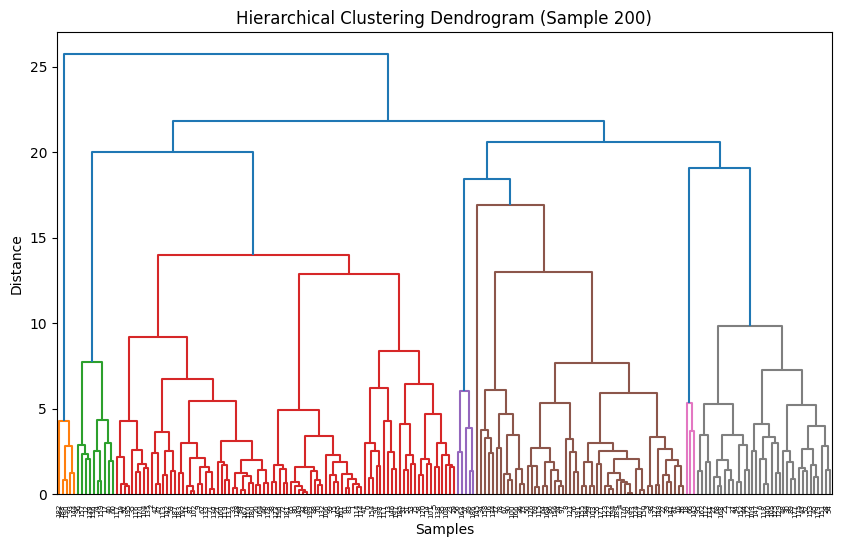

In [77]:
plt.figure(figsize=(10,6))
plt.title("Hierarchical Clustering Dendrogram (Sample 200)")
dendrogram = sch.dendrogram(sch.linkage(X_pca[:200], method='ward'))  
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()


In [78]:
import joblib

# Save trained hierarchical clustering models
joblib.dump(hc1, "hierarchical_model_test1.pkl")
joblib.dump(hc2, "hierarchical_model_test2.pkl")
joblib.dump(hc3, "hierarchical_model_test3.pkl")


['hierarchical_model_test3.pkl']

In [79]:
# Save corresponding cluster labels
joblib.dump(labels1, "hierarchical_labels_test1.pkl")
joblib.dump(labels2, "hierarchical_labels_test2.pkl")
joblib.dump(labels3, "hierarchical_labels_test3.pkl")

print(" Models and cluster labels saved successfully!")

 Models and cluster labels saved successfully!


In [80]:
#  Load one saved model and its labels for test 2
hc_loaded = joblib.load("hierarchical_model_test2.pkl")
labels_loaded = joblib.load("hierarchical_labels_test2.pkl")

print(" Model and labels loaded successfully!")
print("Sample of loaded cluster labels:", labels_loaded[:10])

 Model and labels loaded successfully!
Sample of loaded cluster labels: [1 1 1 1 1 1 1 1 1 1]
